## What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), Berkeley Institute for Data Science

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

Libraries used: Pandas and Matplotlib.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline


I used my web browser to go to ACM Digital Library's table of contents for [CSCW 2015](http://dl.acm.org/citation.cfm?id=2675133&preflayout=flat) and [2016](http://dl.acm.org/citation.cfm?id=2818048&preflayout=flat), which has page listings for every paper. From this, I can calculate each paper's length. I did a very low-tech way of importing the data (which also doesn't violate terms of service): selecting the table of contents in my browser, then copying and pasting the HTML as plain text into a text editor. The files are up on my website. 

Use the command line shell interface to download these files.

In [2]:
!wget http://stuartgeiger.com/cscw-len/cscw-15.txt
!wget http://stuartgeiger.com/cscw-len/cscw-16.txt

--2016-05-26 13:06:28--  http://stuartgeiger.com/cscw-len/cscw-15.txt
Resolving stuartgeiger.com (stuartgeiger.com)... 162.249.2.237
Connecting to stuartgeiger.com (stuartgeiger.com)|162.249.2.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77662 (76K) [text/plain]
Saving to: ‘cscw-15.txt’

cscw-15.txt         100%[=====================>]  75.84K   369KB/s   in 0.2s   

2016-05-26 13:06:28 (369 KB/s) - ‘cscw-15.txt’ saved [77662/77662]

--2016-05-26 13:06:29--  http://stuartgeiger.com/cscw-len/cscw-16.txt
Resolving stuartgeiger.com (stuartgeiger.com)... 162.249.2.237
Connecting to stuartgeiger.com (stuartgeiger.com)|162.249.2.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67881 (66K) [text/plain]
Saving to: ‘cscw-16.txt’

cscw-16.txt         100%[=====================>]  66.29K   324KB/s   in 0.2s   

2016-05-26 13:06:29 (324 KB/s) - ‘cscw-16.txt’ saved [67881/67881]



Peeking at these files, they have the page numbers in lines that begin with "Pages:"

In [3]:
!head -n 25 cscw-15.txt

Table of Contents

previousprevious proceeding |next proceeding next
SESSION: Keynote Address
The Facebook Study: A Personal Account of Data Science, Ethics and Change
Jeff T. Hancock
Pages: 1-1
doi>10.1145/2675133.2697078
Full text: PDFPDF

Big social data, such as that produced by Facebook and Twitter, have the potential to transform the social sciences and lead to advances in understanding human behavior. At the same time, novel large-scale methods and forms of collaboration between academia ... expand
SESSION: Crowdfunding
Understanding the Effects of Crowdfunding on Entrepreneurial Self-Efficacy
Emily Harburg, Julie Hui, Michael Greenberg, Elizabeth M. Gerber
Pages: 3-16
doi>10.1145/2675133.2675142
Full text: PDFPDF

Crowdfunding is emerging as a new socio-technical system that is changing how entrepreneurs interact with their community of financial supporters. While computer supported cooperative work (CSCW) researchers have begun to explore how this new type of ... expand
Crowds

We can use grep to just get these lines containing "Pages: ":

In [4]:
!cat cscw-15.txt | grep "Pages: " | head

Pages: 1-1
Pages: 3-16
Pages: 17-30
Pages: 31-43
Pages: 44-55
Pages: 56-68
Pages: 69-81
Pages: 82-94
Pages: 95-104
Pages: 105-115


Create the beginning of two CSV files, with headers for the start and end pages

In [5]:
!echo "start_page,end_page" > cscw-15-pages.csv
!echo "start_page,end_page" > cscw-16-pages.csv

Parse these files for lines containing "Pages:", then remove "Pages: " and replace the dash with a comma. Append this to the CSV files.

In [6]:
!cat cscw-15.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-15-pages.csv
!cat cscw-16.txt | grep "Pages: " | sed -e 's/Pages: //g' | sed -e 's/-/,/g' >> cscw-16-pages.csv

Load these into Pandas dataframes.

In [7]:
cscw15 = pd.read_csv("cscw-15-pages.csv")
cscw16 = pd.read_csv("cscw-16-pages.csv")

Create new dataframes containing the length of each paper by subtracting the start page from the end page, then adding one.

In [8]:
cscw15_len = cscw15['end_page']-cscw15['start_page']+1
cscw16_len = cscw16['end_page']-cscw16['start_page']+1


Show summary statistics and bar plots.

In [9]:
cscw15_len.describe()


count    163.000000
mean      11.693252
std        2.334210
min        1.000000
25%       11.000000
50%       12.000000
75%       13.000000
max       17.000000
dtype: float64

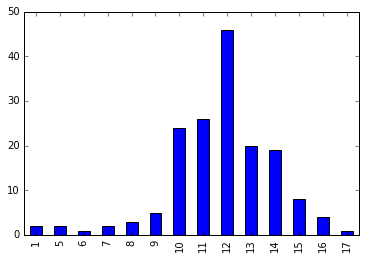

In [10]:
cscw15_len.value_counts(sort=False).plot(kind='bar')

In [11]:
cscw16_len.describe()

count    142.000000
mean      12.598592
std        1.794633
min        6.000000
25%       12.000000
50%       13.000000
75%       14.000000
max       17.000000
dtype: float64

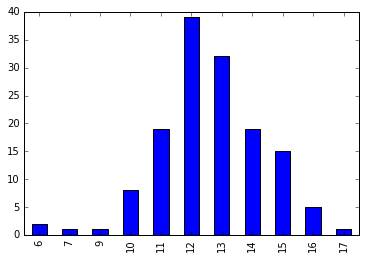

In [12]:
cscw16_len.value_counts(sort=False).plot(kind='bar')